In [1]:
#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
#import ipywidgets as ipw
#from scipy.integrate import odeint

Clase 1

In [2]:
def euler(f, t0, tn, x0, h):
    n=int((tn-t0)/h)
    t=np.linspace(t0, tn, n+1)
    x=np.zeros(n+1)
    x[0]=x0
    for i in range(1, n+1):
        x[i]=x[i-1]+h*f(t[i-1], x[i-1])
    return((t,x))

In [3]:
K = 10000
r = 0.7
p_0 = 2
def logis(t,x):
    y=r*x*(1-(x/K))
    return(y)

def sol_logis(t,K,r,p_0):
    return(K/(1+((K-p_0)/p_0)*np.exp(-r*t)))

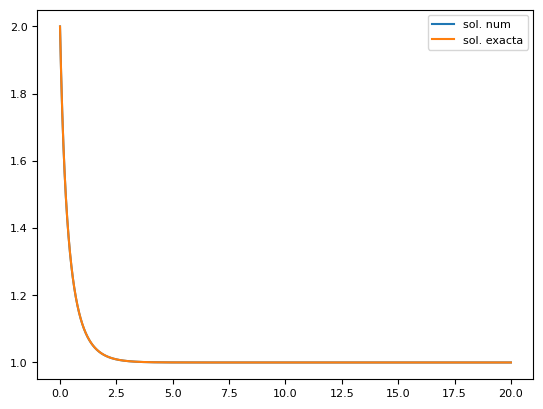

In [30]:
t,x = euler(logis, 0, 20, 2, 0.001)
t_2 = euler(logis, 0, 20, 2, 0.001)[0]
x_2 = []
for i in range(len(t)):
    x_2.append(sol_logis(t[i],K,r,p_0))

plt.plot(t,x, label="sol. num")
plt.plot(t_2,x_2, label="sol. exacta")
plt.legend()

Clase 2

# **Sistema predador-presa**

In [5]:
#x poblacion de predadores y poblacion de presas
alpha = 0.25 # x en ausencia de presas tiende a decaer a una tasa alpha
beta = 1  # y en ausencia de predadores tiende a crecer a una tasa beta
gamma = 0.01 # gamma*y es la tasa de crecimiento de x (mayor cuanto más presas haya)
delta = 0.01 # delta*x es la tasa de mortandad de y (mayor cuanto más predadores haya)

x0 = 80 #cantidad inicial predadores
y0 = 30 #cantidad inicial presas

In [6]:
def derivadas(X, t, alpha, beta, gamma, delta):
    x, y = X
    dotx = x * (-alpha + gamma * y)
    doty = y * (beta - delta * x)
    return np.array([dotx, doty])

Resolvemos usando odeint

In [7]:
Nt = 1000
tmax = 20
t = np.linspace(0,tmax, Nt)
X0 = [x0, y0]
res = integrate.odeint(derivadas, X0, t, args = (alpha, beta, gamma, delta))
x, y = res.T

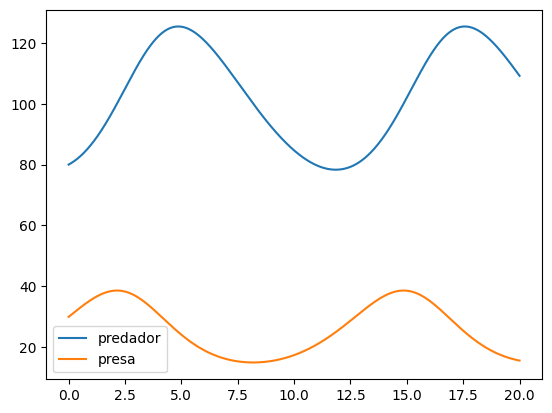

In [8]:
plt.plot(t, x, label = 'predador')
plt.plot(t, y, label = "presa")
plt.legend()

Diagrama de fase usando streamplot

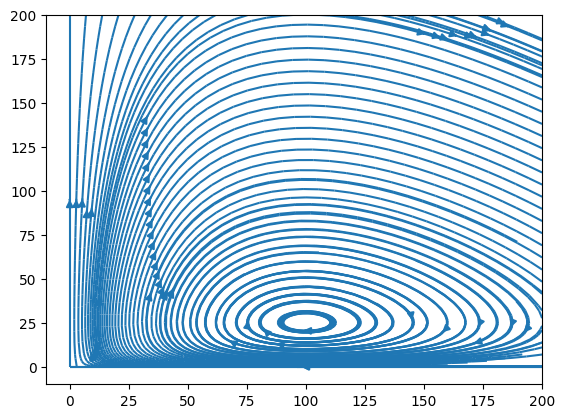

In [9]:
w_1 = 0
w_2 = 200
Y, X = np.mgrid[w_1:w_2:100j, w_1:w_2:100j]
U = X * (-alpha + gamma * Y)
V = Y * (beta - delta * X)

plt.streamplot(X, Y, U, V, density=[1, 1], broken_streamlines=False)
#plt.plot([1],[1], marker = 'o', markersize=6, linestyle=' ', color="red")
#plt.title('Varying Density')
plt.show()

Modelo Hutchison (delay)

In [10]:
pip install ddeint

  Preparing metadata (setup.py) ... done
  Created wheel for ddeint: filename=ddeint-0.2-py3-none-any.whl size=3953 sha256=48325db724d3cb0ca64dca6f776f6d6adaa0086ad92e65552eda8624db20096a
  Stored in directory: /root/.cache/pip/wheels/dc/53/af/307886db6b88166a10bb2412b0fcc75e986ae56df1c6ad8c08
Successfully built ddeint


In [11]:
pip install jitcdde

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for jitcdde: filename=jitcdde-1.8.1-py3-none-any.whl size=55003 sha256=77417f4cd116a7e5bd63983c4419c2f38d57ca2900a8f2fba79a8be2d0660519
  Stored in directory: /root/.cache/pip/wheels/42/e3/4e/94b61188e5e3e62ba27e9586da5ecc7ea0f24e26916a250cc7
  Created wheel for chspy: filename=CHSPy-1.2.2-py3-none-any.whl size=11999 sha256=0ebf54eda3eec4c10d471ce3811e5bff3c2c79ec2883cc096f522a376c864108
  Stored in directory: /root/.cache/pip/wheels/11/17/24/0cca70842afd051f54325b813e637d8e8836d88c286ba63fae
  Created wheel for jitcxde_common: filename=jitcxde_common-1.5.4-py3-none-any.whl size=16755 sha256=9a3507ed2a64bf9a1c50c0f1ec9aed81e269fa0783ed77e78b7701e450e1f236
  Stored in directory: /root/.cach

Generating, compiling, and loading C code.
Using default integration parameters.


/usr/local/lib/python3.10/dist-packages/jitcdde/_jitcdde.py:795: UserWarning: You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.
  warn("You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.")
/usr/local/lib/python3.10/dist-packages/jitcdde/_jitcdde.py:792: UserWarning: The target time is smaller than the current time. 

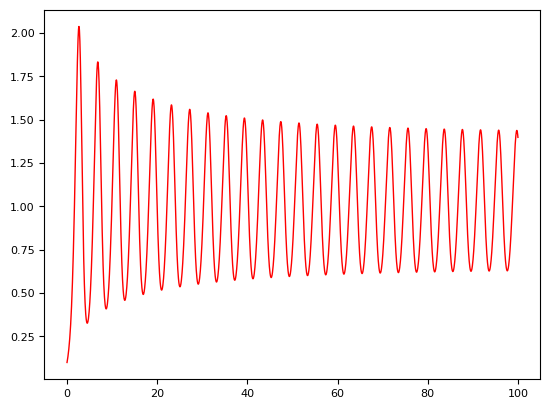

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from jitcdde import jitcdde, y, t
K = 1
r = 1.6
equation = [r*y(0, t)*(1-y(0, t-1.)/K)]
dde = jitcdde(equation)

plt.rcParams['font.size'] = 8

ts = np.linspace(0, 100, 2000)

dde.constant_past([0.1])
ys = []
for t in ts:
	ys.append(dde.integrate(t))
plt.plot(ts, ys, color='red', linewidth=1)



plt.show()

Clase 3


In [13]:
def equations(X, t, m1, m2, m3, k1, k2):# juguemos primero con un oscilador
    x1, x2, x3, v1, v2, v3 = X    # unpack variables
    dx1 = v1
    dx2 = v2
    dx3 = v3
    dv1 = -k1/m1 * x1 + k1/m1 * x2
    dv2 = k1/m2 * x1 - (k1+k2)/m2 * x2 + k2/m2 * x3
    dv3 = k2/m3 * x2 - k2/m3 * x3
    dXdt = [dx1, dx2, dx3, dv1, dv2, dv3]    # pack derivatives
    return dXdt

In [14]:
# choose parameters
m1, m2, m3 = 1, 2, 3
k1, k2 = 2, 1

# specify initial values
x1i, x2i, x3i = 0, 0.4, -0.4
v1i, v2i, v3i = 0, 0, 0
init = [x1i, x2i, x3i, v1i, v2i, v3i]

T = 20.    # total time to solve for
time = np.arange(0, T, 0.1)    # time points to evaluate solution at

sol = integrate.odeint(equations, init, time, args=(m1, m2, m3, k1, k2))    # solve equations
X = sol[:,0:3]    # vector X consists of the first three components of the solution

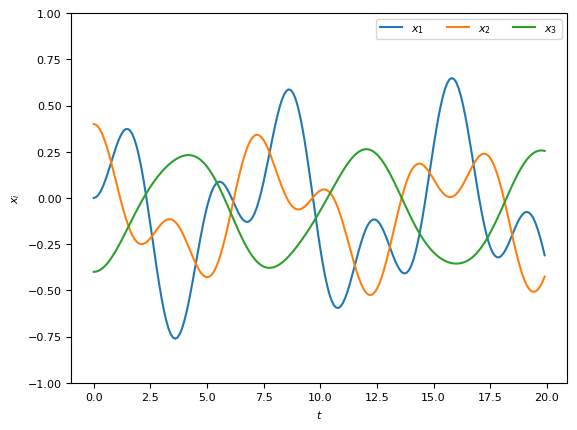

In [15]:
plt.figure()
for i in range(3):
    plt.plot(time, X[:,i], label=f'$x_{i+1}$')
plt.ylim(-1, 1)
plt.xlabel(r'$t$')
plt.ylabel(r'$x_i$')
plt.legend(ncol=3)
plt.show()

Problema 3 cuerpos

In [16]:
def planeta(X, t, G, m):
    x1, x2, v1, v2 = X    # unpack variables
    dx1 = v1
    dx2 = v2
    dv1 = -(G * x1)/(np.sqrt(x1**2+x2**2))**3
    dv2 = -(G * x2)/(np.sqrt(x1**2+x2**2))**3
    dXdt = [dx1, dx2, dv1, dv2]    # pack derivatives
    return dXdt

In [17]:
# choose parameters
m=1
G=0.1

# specify initial values
x1i, x2i = 0.5, 0
v1i, v2i = 1, 1
init = [x1i, x2i, v1i, v2i]

T = 20.    # total time to solve for
time = np.arange(0, T, 0.1)    # time points to evaluate solution at

sol = integrate.odeint(planeta, init, time, args=(m, G))    # solve equations
X = sol[:,0:2]    # vector X consists of the first three components of the solution

In [18]:
def planeta2(X, t, G, m):
    x1, x2, x3, x4, v1, v2, v3, v4 = X    # unpack variables
    dx1 = v1
    dx2 = v2
    dx3 = v3
    dx4 = v4
    dv1 = -(G * (x1-x3))/(np.sqrt((x1-x3)**2+(x2-x4)**2))**3
    dv2 = -(G * (x2-x4))/(np.sqrt((x1-x3)**2+(x2-x4)**2))**3
    dv3 = (G * (x1-x3))/(np.sqrt((x1-x3)**2+(x2-x4)**2))**3
    dv4 = (G * (x2-x4))/(np.sqrt((x1-x3)**2+(x2-x4)**2))**3
    dXdt = [dx1, dx2, dx3, dx4, dv1, dv2, dv3, dv4]    # pack derivatives
    return dXdt

In [19]:
# choose parameters
m=1
G=0.1

# specify initial values
x1i, x2i, x3i, x4i = 0.5, 0, 0, 0
v1i, v2i, v3i, v4i = 1, 1, -1, 0
init = [x1i, x2i, x3i, x4i, v1i, v2i, v3i, v4i]

T = 20.    # total time to solve for
time = np.arange(0, T, 0.1)    # time points to evaluate solution at

sol = integrate.odeint(planeta2, init, time, args=(m, G))    # solve equations
X = sol[:,0:4]    # vector X consists of the first three components of the solution

In [20]:
from mpl_toolkits.mplot3d import Axes3D

In [21]:
def planeta3(X, t, G, m):
    x1, x2, x3, x4, x5, x6, x7, x8, x9, v1, v2, v3, v4, v5, v6, v7, v8, v9= X    # unpack variables
    dx1 = v1
    dx2 = v2
    dx3= v3
    dx4 = v4
    dx5 = v5
    dx6= v6
    dx7 = v7
    dx8 = v8
    dx9= v9
    dv1 = -(G * (x1-x4))/(np.sqrt((x1-x4)**2+(x2-x5)**2+(x3-x6)**2))**3-(G * (x1-x7))/(np.sqrt((x1-x7)**2+(x2-x8)**2+(x3-x9)**2))**3
    dv2 = -(G * (x2-x5))/(np.sqrt((x1-x4)**2+(x2-x5)**2+(x3-x6)**2))**3-(G * (x2-x8))/(np.sqrt((x1-x7)**2+(x2-x8)**2+(x3-x9)**2))**3
    dv3 = -(G * (x3-x6))/(np.sqrt((x1-x4)**2+(x2-x5)**2+(x3-x6)**2))**3-(G * (x3-x9))/(np.sqrt((x1-x7)**2+(x2-x8)**2+(x3-x9)**2))**3
    dv4 = -(G * (x4-x1))/(np.sqrt((x1-x4)**2+(x2-x5)**2+(x3-x6)**2))**3-(G * (x4-x7))/(np.sqrt((x4-x7)**2+(x5-x8)**2+(x6-x9)**2))**3
    dv5 = -(G * (x5-x2))/(np.sqrt((x1-x4)**2+(x2-x5)**2+(x3-x6)**2))**3-(G * (x5-x8))/(np.sqrt((x4-x7)**2+(x5-x8)**2+(x6-x9)**2))**3
    dv6 = -(G * (x6-x3))/(np.sqrt((x1-x4)**2+(x2-x5)**2+(x3-x6)**2))**3-(G * (x6-x9))/(np.sqrt((x4-x7)**2+(x5-x8)**2+(x6-x9)**2))**3
    dv7 = -(G * (x7-x4))/(np.sqrt((x7-x4)**2+(x8-x5)**2+(x9-x6)**2))**3-(G * (x7-x1))/(np.sqrt((x1-x7)**2+(x2-x8)**2+(x3-x9)**2))**3
    dv8 = -(G * (x8-x5))/(np.sqrt((x7-x4)**2+(x8-x5)**2+(x9-x6)**2))**3-(G * (x8-x2))/(np.sqrt((x1-x7)**2+(x2-x8)**2+(x3-x9)**2))**3
    dv9 = -(G * (x9-x6))/(np.sqrt((x7-x4)**2+(x8-x5)**2+(x9-x6)**2))**3-(G * (x9-x3))/(np.sqrt((x1-x7)**2+(x2-x8)**2+(x3-x9)**2))**3

    dXdt = [dx1, dx2, dx3, dx4, dx5, dx6, dx7, dx8, dx9, dv1, dv2, dv3, dv4, dv5, dv6, dv7, dv8, dv9]    # pack derivatives
    return dXdt

In [22]:
# choose parameters
m=1
G=0.1

# specify initial values
x1i, x2i, x3i, x4i, x5i, x6i, x7i, x8i, x9i = 0.5, 0, 0, 0, 0.5, 0, 0, 0, 0.5
v1i, v2i, v3i, v4i, v5i, v6i, v7i, v8i, v9i = 1, 1, -1, 0, 0, 0, 0.5, 0, 0.5
init = [x1i, x2i, x3i, x4i, x5i, x6i, x7i, x8i, x8i, v1i, v2i, v3i, v4i, v5i, v6i, v7i, v8i, v9i]

T = 20.    # total time to solve for
time = np.arange(0, T, 0.01)    # time points to evaluate solution at

sold = integrate.odeint(planeta3, init, time, args=(m, G))    # solve equations
sol = sold.T

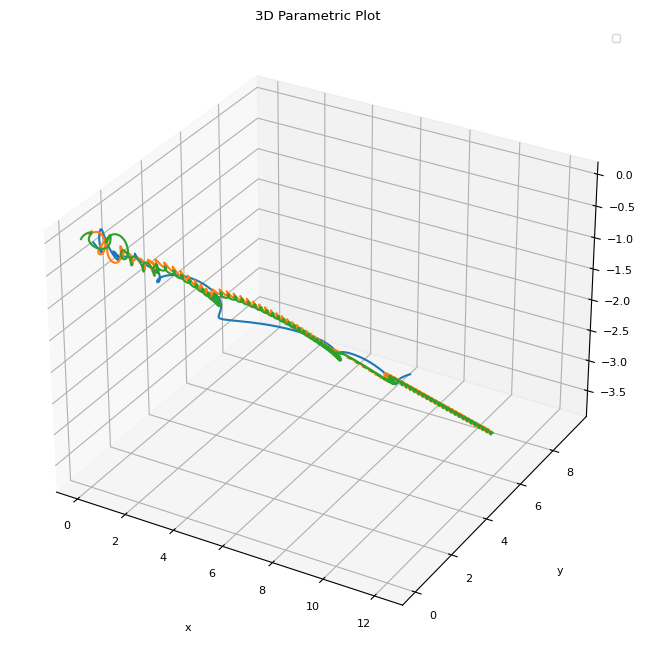

In [23]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.grid()

x_1 = sol[0]
x_2 = sol[1]
x_3 = sol[2]
x_4 = sol[3]
x_5 = sol[4]
x_6 = sol[5]
x_7 = sol[6]
x_8 = sol[7]
x_9 = sol[8]
ax.plot3D(x_1, x_2, x_3)
ax.plot3D(x_4, x_5, x_6)
ax.plot3D(x_7, x_8, x_9)
ax.set_title('3D Parametric Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('t', labelpad=20)
plt.legend()
plt.show()

Clase 4



Péndulo


In [24]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

In [25]:
y0 = [np.pi/2, 0.0]

In [26]:
def plotpendulo(b, c):
    #t = np.arange(-10,10)
    t = np.arange(0,20)
    u = integrate.odeint(pend, y0, t, args=(b, c))
    plt.plot(t,u)
    plt.grid()
    plt.show()

In [27]:
b = -0.25
c = 5

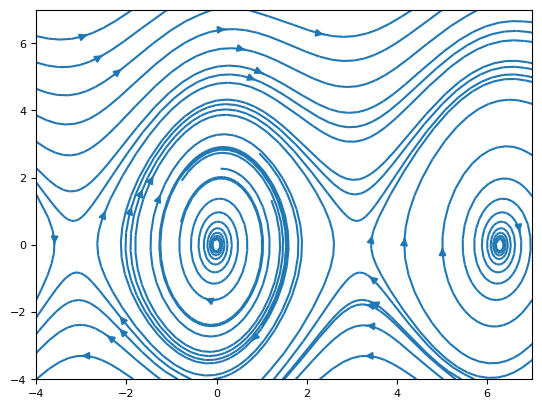

In [28]:
w_1 = -4
w_2 = 7
Y, X = np.mgrid[w_1:w_2:100j, w_1:w_2:100j]
U = Y
V = -b*Y - c*np.sin(X)

plt.streamplot(X, Y, U, V, density=[0.5, 0.5], broken_streamlines=False)
#plt.plot([1],[1], marker = 'o', markersize=6, linestyle=' ', color="red")
#plt.title('Varying Density')
plt.show()